In [1]:
import oritelib as ori
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def seq_from_fasta_test(file_path):
    f=open(file_path, "r")

    all_lines = f.readlines()

    sequence = ''

    for i in range(1, len(all_lines)):
        sequence =  sequence + all_lines[i][0:len(all_lines[i])-1]

    return sequence

In [3]:
eco_fasta = seq_from_fasta_test("test_data/bordetella.fna")

In [31]:
eco_fasta = eco_fasta[1000000:] + eco_fasta[0:1000000]

In [32]:
eco_fasta[(len(eco_fasta)-6):]

'CTGGAG'

In [33]:
len(eco_fasta)+(2*52697)

4191583

In [34]:
len(eco_fasta)

4086189

In [35]:
eco_gb_plus, eco_gb_neg = ori.genbank_to_non_coding_intervals("test_data/bordetella.gbff")

In [36]:
eco_gb_plus_lengths = []
index_of_long_nc = []

for i in range(len(eco_gb_plus)):
    lengths = eco_gb_plus[i][1] - eco_gb_plus[i][0]
    if lengths > 5000:
        index_of_long_nc.append(i)
    eco_gb_plus_lengths.append(lengths)

In [37]:
hist_vals, bin_boundaries = np.histogram(eco_gb_plus_lengths)

(array([1.172e+03, 1.570e+02, 7.100e+01, 3.700e+01, 1.800e+01, 6.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 5.000e+00]),
 array([2.00000e+00, 2.44570e+03, 4.88940e+03, 7.33310e+03, 9.77680e+03,
        1.22205e+04, 1.46642e+04, 1.71079e+04, 1.95516e+04, 2.19953e+04,
        2.44390e+04]),
 <a list of 10 Patch objects>)

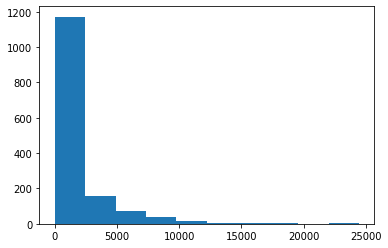

In [38]:
plt.hist(eco_gb_plus_lengths, bins = 10)

In [39]:
nc_pos_set = set()
nc_region_pos = []

for i in index_of_long_nc:
    start = eco_gb_plus[i][0]
    stop = eco_gb_plus[i][1] 
    index = list(range(start,stop+1))
    nc_region_pos.append(index)
    nc_pos_set.update(index)
    
all_nc_pos = list(nc_pos_set)
all_nc_pos.sort()

In [40]:
GC_val_eco, CGC_val_eco = ori.gc_skew_sliding_window(eco_fasta, window_rad = 500)

seq len:  4086189
window_rad:  500
extended seq length:  4087189


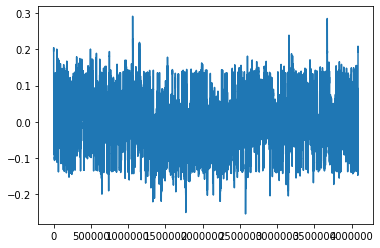

In [41]:
plt.plot(GC_val_eco)

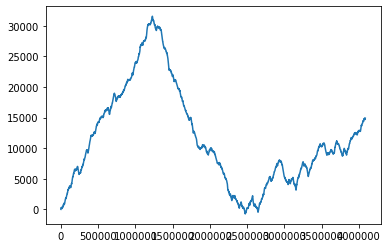

In [42]:
plt.plot(CGC_val_eco)

In [43]:
np_array_all_nc_pos = np.array(all_nc_pos)


In [44]:
 nc_gc_vals = CGC_val_eco[np_array_all_nc_pos]

In [45]:
len(GC_val_eco)

4086189

In [46]:
len(np_array_all_nc_pos)

1283893

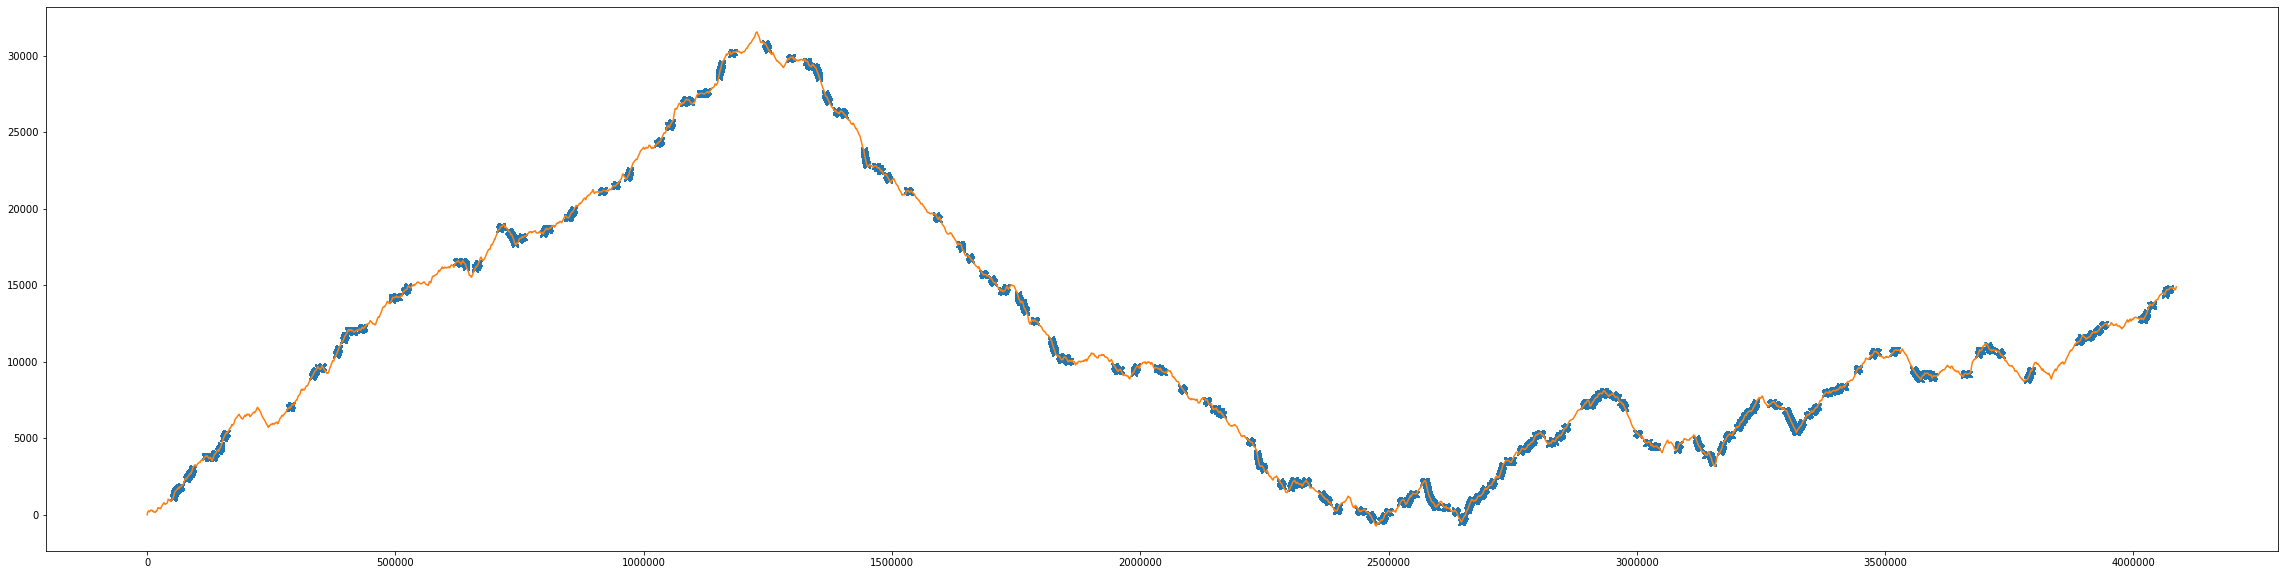

In [47]:
plt.figure(figsize = [40,10])

plt.plot(np_array_all_nc_pos,nc_gc_vals, 'x')
plt.plot(CGC_val_eco)

In [48]:
def avg_region_CGC(region_pos, CGC_curve):
    return np.average(CGC_curve[region_pos])

    

In [49]:
avg_region_CGC(list(range(1900000,2000000)),CGC_val_eco)

9792.507168455972